<h1><center> Deep Learning Bootcamp Project: Handwriting Charactors Recognition </center></h1>
<h3><center> Student: Faluke Aikebaier </center></h3>

# 1. Introduction

Handwriting recognition (HWR), also known as Handwritten Text Recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices. The image of the written text may be sensed "off line" from a piece of paper by optical scanning (optical character recognition) or intelligent word recognition. This also includes scanning old books for research or other purposes. This project focuses on such "off line" handwriting recognition, text is analysed after being written.

Off-line handwriting recognition involves the automatic conversion of text in an image into letter codes which are usable within computer and text-processing applications. The data obtained by this form is regarded as a static representation of handwriting. Off-line handwriting recognition is comparatively difficult, as different people have different handwriting styles. 

The ﬁrst Optical Character Recognition (OCR) software developed in 1974 by Ray Kurzweil. By reducing the problem domain, the process was more accurate. This allowed for recognition in handwritten forms. However, it lacked eﬃciency and knowledge of unexpected characters. These classical techniques carried heavy limitations in two key areas:
- Character extraction
- Character recognition
- Feature extraction

Where traditional techniques focus on segmenting individual characters for recognition, modern techniques focus on recognizing all the characters in a segmented line of text. Deep learning has been widely used to recognise handwriting. Which are able to learn visual features, avoiding the limiting feature engineering previously used.

References:
1. [Wikipedia on Handwriting recognition](https://en.wikipedia.org/wiki/Handwriting_recognition)
2. [Blog: Have we solved the problem of handwriting recognition?](https://towardsdatascience.com/https-medium-com-rachelwiles-have-we-solved-the-problem-of-handwriting-recognition-712e279f373b)

# 2. Problem Formulation

The aim of the handwriting recognition is versatile. However, the nature of the problem is the same -- make computers to recognize the charactors. This requires an algorithm with recognized pairs of images and charactors, which can create an output from a set of unseen images without the help of a human. This defines the problem as a supervised machine learning problem. 

In such a problem, data points are constitutes of images represented by pixels. Namely, an image dataset is needed to construct such model. The kaggle dataset of [Handwriting Recognition](https://www.kaggle.com/landlord/handwriting-recognition) consists of more than four hundred thousand handwritten names collected through charity projects, which suits the aim of this project.

## 1) The dataset

The dataset consists of three separate collections of train, validation, and test sets, with the recognized names in csv files. We first start by exploring these csv files.

### (1) Written name sets

In [1]:
import pandas as pd

In [2]:
train_name=pd.read_csv("Handwriting Recognition/written_name_train_v2.csv")
valid_name=pd.read_csv("Handwriting Recognition/written_name_validation_v2.csv")
test_name=pd.read_csv("Handwriting Recognition/written_name_test_v2.csv")

In [3]:
print(train_name.shape)
print(valid_name.shape)
print(test_name.shape)

(330961, 2)
(41370, 2)
(41370, 2)


In [4]:
print(train_name.head(10))
print(valid_name.head(10))
print(test_name.head(10))

          FILENAME   IDENTITY
0  TRAIN_00001.jpg  BALTHAZAR
1  TRAIN_00002.jpg      SIMON
2  TRAIN_00003.jpg      BENES
3  TRAIN_00004.jpg    LA LOVE
4  TRAIN_00005.jpg     DAPHNE
5  TRAIN_00006.jpg      LUCIE
6  TRAIN_00007.jpg     NASSIM
7  TRAIN_00008.jpg   ASSRAOUI
8  TRAIN_00009.jpg     LAVIAN
9  TRAIN_00010.jpg      MAEVA
              FILENAME     IDENTITY
0  VALIDATION_0001.jpg        BILEL
1  VALIDATION_0002.jpg   LAUMIONIER
2  VALIDATION_0003.jpg          LEA
3  VALIDATION_0004.jpg    JEAN-ROCH
4  VALIDATION_0005.jpg         RUPP
5  VALIDATION_0006.jpg   UNREADABLE
6  VALIDATION_0007.jpg       PICHON
7  VALIDATION_0008.jpg       DANIEL
8  VALIDATION_0009.jpg       JEREMY
9  VALIDATION_0010.jpg  JEAN-MICHEL
        FILENAME   IDENTITY
0  TEST_0001.jpg      KEVIN
1  TEST_0002.jpg   CLOTAIRE
2  TEST_0003.jpg       LENA
3  TEST_0004.jpg      JULES
4  TEST_0005.jpg    CHERPIN
5  TEST_0006.jpg     MARTIN
6  TEST_0007.jpg  VALENTINE
7  TEST_0008.jpg      LORAS
8  TEST_0009.jpg   THI

In [5]:
print(train_name['IDENTITY'].value_counts())
print(valid_name['IDENTITY'].value_counts())
print(test_name['IDENTITY'].value_counts())

THOMAS                1825
EMPTY                 1796
LEA                   1582
EMMA                  1482
LUCAS                 1479
                      ... 
ROGER DE CAMPAGNOL       1
CURRAT                   1
FURCUMOLLER              1
MARIA-JOSIE              1
PULGARIN                 1
Name: IDENTITY, Length: 100539, dtype: int64
THOMAS           219
LEA              204
LUCAS            195
EMPTY            187
EMMA             186
                ... 
URBANIK            1
MELIHA             1
ROUVERON           1
KVARATSKHELIA      1
ELWIN              1
Name: IDENTITY, Length: 20227, dtype: int64
THOMAS      227
EMPTY       221
EMMA        202
LEA         200
HUGO        187
           ... 
TORDJMAN      1
JOURNET       1
PHILEMON      1
RODRIGO       1
GUIDO         1
Name: IDENTITY, Length: 20279, dtype: int64


In [6]:
print(train_name.isnull().sum())
print(valid_name.isnull().sum())
print(test_name.isnull().sum())

FILENAME      0
IDENTITY    565
dtype: int64
FILENAME     0
IDENTITY    78
dtype: int64
FILENAME     0
IDENTITY    70
dtype: int64


**Important Observations: the dataset is needed to be cleaned**
- There contain some unredable images, written as unredable in the identity column
- There are missing values

### (2) Cleaning the written name sets

In [7]:
train_name.dropna(axis=0, inplace=True)
valid_name.dropna(axis=0, inplace=True)
test_name.dropna(axis=0, inplace=True)

In [8]:
train_name=train_name[train_name['IDENTITY']!='UNREADABLE']
valid_name=valid_name[valid_name['IDENTITY']!='UNREADABLE']
test_name=test_name[test_name['IDENTITY']!='UNREADABLE']

In [9]:
print(train_name.shape)
print(valid_name.shape)
print(test_name.shape)

(330294, 2)
(41280, 2)
(41289, 2)


After cleaning, the the number of images reduced 413,701 to 412,863.

### (3) Image sets

In [10]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

#### a) Load a single sample image

In [11]:
filenames = glob.glob('Handwriting Recognition/train_v2/train/*.jpg')

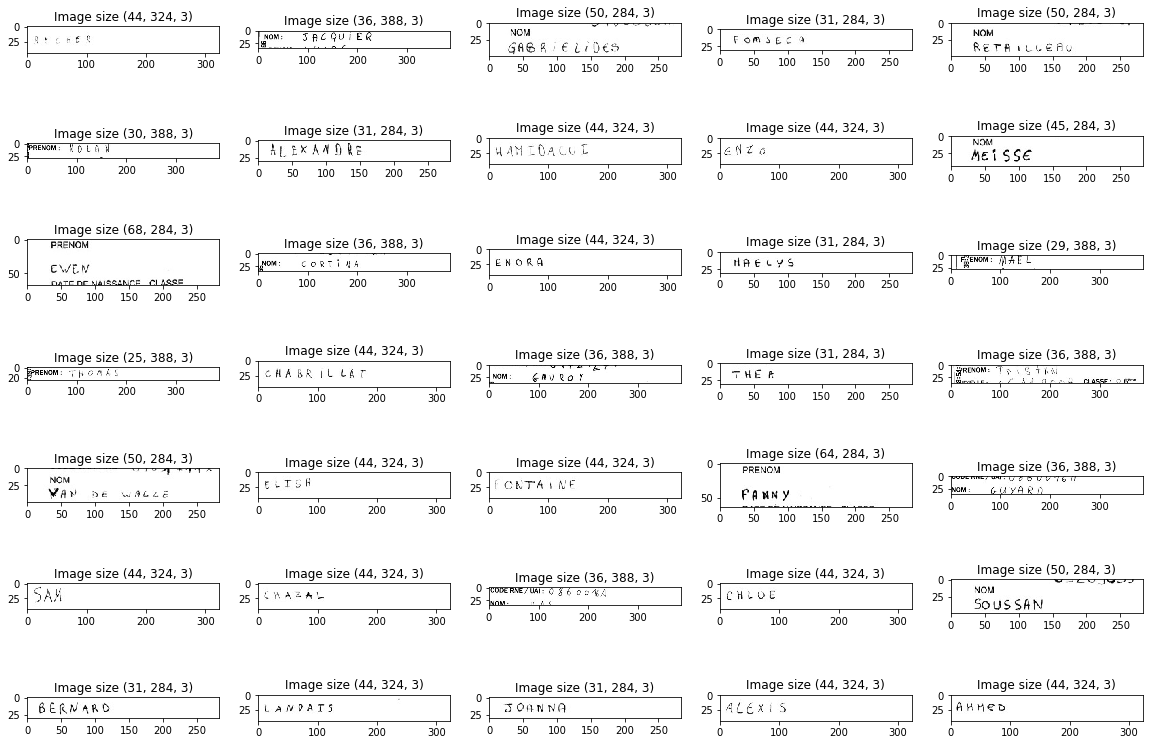

In [12]:
plt.figure(figsize=(20, 14))
for i in range(35):
    ax = plt.subplot(7, 5, i+1)
    sample = mpimg.imread(filenames[i])
    plt.imshow(sample)
    plt.title('Image size '+str(sample.shape))

**Important observation:** Images with height higher than 44 contains extra letters, same applies to images with length more than 284. 

Further analysis shows that,  most of the images (above 98 %) are with height 31 pixel. In order to avoid complications, we will fix the height as 31 pixel.

#### b) Filter the image data

In [13]:
train_img_path=[]
train_name_path=[]
for file_name in train_name['FILENAME'].to_list():
    img_path = 'Handwriting Recognition/train_v2/train/'+file_name
    sample=mpimg.imread(img_path,format='jpg')
    if (sample.shape[0] == 31) and (sample.shape[1] <= 284):
        train_img_path.append(img_path)
        train_name_path.append(file_name)

In [14]:
valid_img_path=[]
valid_name_path=[]
for file_name in valid_name['FILENAME'].to_list():
    img_path = 'Handwriting Recognition/validation_v2/validation/'+file_name
    sample=mpimg.imread(img_path,format='jpg')
    if (sample.shape[0] == 31) and (sample.shape[1] <= 284):
        valid_img_path.append(img_path)
        valid_name_path.append(file_name)
test_img_path=[]
test_name_path=[]
for file_name in test_name['FILENAME'].to_list():
    img_path = 'Handwriting Recognition/test_v2/test/'+file_name
    sample=mpimg.imread(img_path,format='jpg')
    if (sample.shape[0] == 31) and (sample.shape[1] <= 284):
        test_img_path.append(img_path)
        test_name_path.append(file_name)

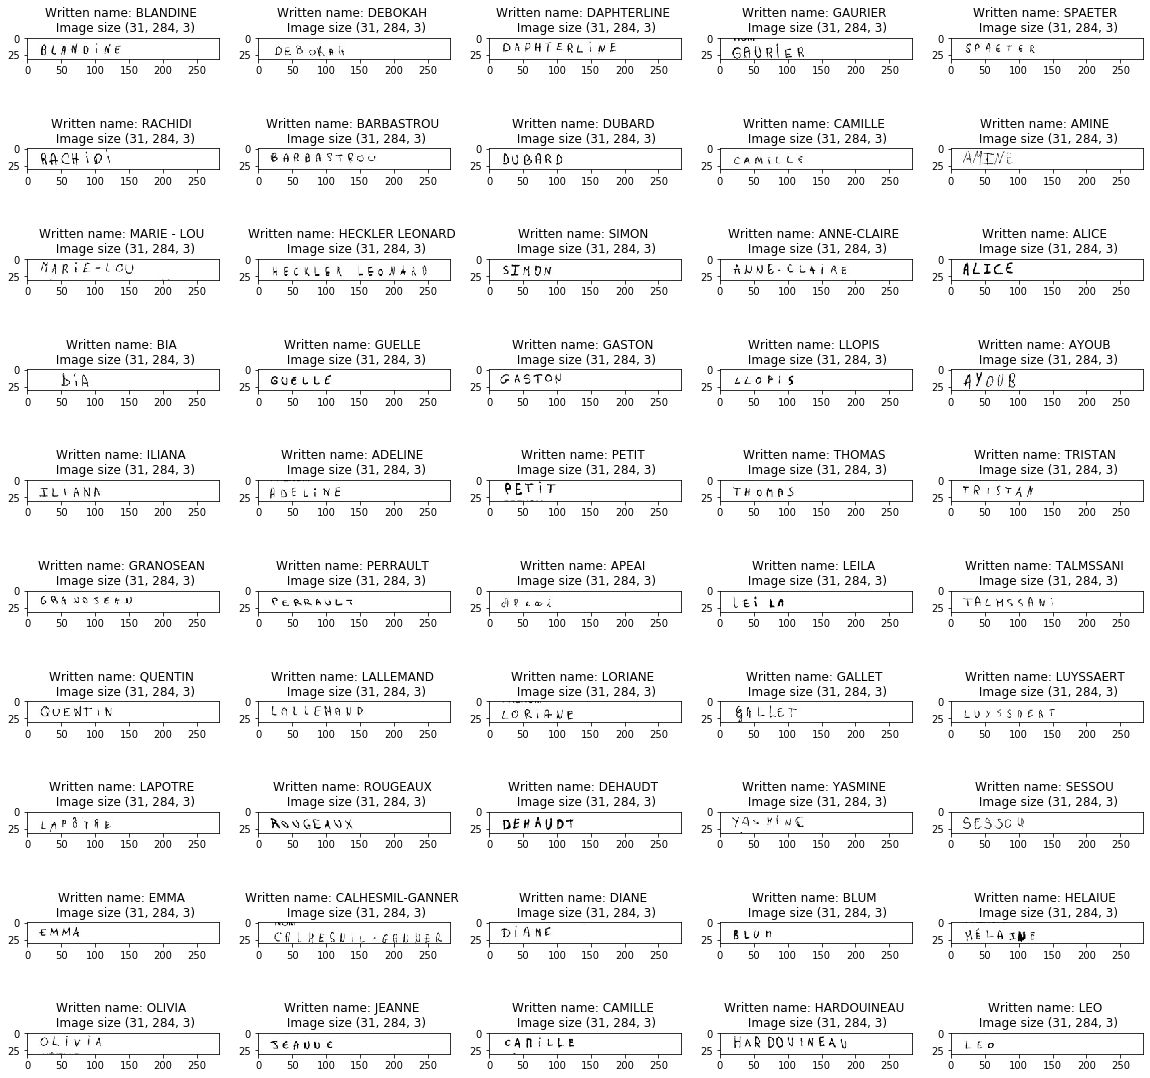

In [15]:
plt.figure(figsize=(20, 20))
for i in range(50):
    ax = plt.subplot(10, 5, i+1)
    sample = mpimg.imread(train_img_path[i+5000])
    plt.imshow(sample)
    plt.title('Written name: {} \n Image size '.format(train_name[train_name['FILENAME']==train_name_path[i+5000]]['IDENTITY'].values[0])\
              +str(sample.shape))

In [16]:
print("After filetring:")
print("The number of images for train set is {}".format(len(train_img_path)))
print("The number of images for validation set is {}".format(len(valid_img_path)))
print("The number of images for test set is {}".format(len(test_img_path)))

After filetring:
The number of images for train set is 72570
The number of images for validation set is 9111
The number of images for test set is 9039


**Conclusion:** After data cleaning, the number of images in each set are changed substantially. Since the ratios between various datasets are broken, it is better to join all the images together, and later split by keras library. Moreover, the lengths of the images are mostly below 255.0. We can crop the images when we collect them. However, some of the handwritten names are very diffifult with human eyes. In the above sample, there are at least 10 out of 50 images cannot be recognized by human eyes. For example, APEAI. This may influence the model accuracy.

#### c) Constructing image sets

In order to save storage, we read the data in gray scale.

In [17]:
image_set_paths=train_img_path+valid_img_path+test_img_path

In [18]:
image_list=[]
for path in image_set_paths:
    sample = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    sample = sample[:, :255]
    image_list.append(sample)

In [19]:
image_array=np.empty([len(image_list), sample.shape[0],sample.shape[1]])
for i, image in enumerate(image_list):
    image_array[i]=image/float(sample.shape[1])

In [20]:
image_array[0].shape

(31, 255)

In [21]:
image_array.shape

(90720, 31, 255)

In [24]:
X_2 = image_array.reshape(-1, sample.shape[1], sample.shape[0], 1)

In [25]:
X_2.shape

(90720, 255, 31, 1)

After filtering the image datasets, there are 90720 images left. Which is approximately 22% of the previous image datasets. But it is enough for training the machine learning model on a local drive. Which can be considered as a first step for this project.

### (4) Target sets

In [26]:
import tensorflow  
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [27]:
train_name_list=train_name.set_index('FILENAME').loc[train_name_path]['IDENTITY'].tolist()
valid_name_list=valid_name.set_index('FILENAME').loc[valid_name_path]['IDENTITY'].tolist()
test_name_list=test_name.set_index('FILENAME').loc[test_name_path]['IDENTITY'].tolist()

In [28]:
target_list=np.array(train_name_list+valid_name_list+test_name_list)

In [29]:
target_list.shape

(90720,)

In [30]:
target_list

array(['LUCIE', 'PAULINE', 'CYRIELLE', ..., 'VANOOST', 'LOZE', 'LYLOU'],
      dtype='<U22')

In [31]:
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(target_list)

In [32]:
vec.shape

(90720,)

In [33]:
vec

array([23980, 29493,  9269, ..., 37043, 23947, 24132])

# 3. Method

As a rule of thumb, it is good to have at least ten times more labeled data points than the number of features. For each image with resolution of $255\times 31$ pixels after cleaning, if we choose a hidden layer consisting of 128 nodes, then for the ANN with a single dense layer, we would need around

\begin{equation}
10\times128\times255\times31=10118400.
\end{equation}

This exceeds the number of features 90720 more than 10 times. Then Convolutional neural networks (CNN) becomes our choice. 

General CNN models consist of an input layer, convolutional block (a set of convolutional layers and pooling layers, and a flatten layer), fully connected (dense) layers, and an output layer. 

For convenience ```train_test_split``` function from the ```sklearn``` library is used for splitting the data for train and test sets. 

For the model training, the CNN model is built by experimenting from one convolutional block (one convolutional layer) and one dense layer. The building process experimented adding/removing additional convolutional blocks (inlcuding various convolutional layers with specified filter numbers), and also experimenting the effects of the number of dense layer and number of nodes in each dense layer. 

The building process aims at increasing the test set accuracy. This easily ends up overfitting. Various parameters are chosen to cure the overfitting, and the following remedy is found at the end:
- Use ```relu``` as the activation function in the convolutional layers
- Use one convolutional layer in each convolutional block
- Use four convolutional blocks
- The number of filters increases by a factor of 2, for the convolutional layer in the next convolutional block
- Choose the dense layer nodes as 256
- For training the model
    - Use validation_split as 0.01
    - Set batch size as 512
    - Use early stopping in callback
    - Use ```dropout```for regularization.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [38]:
#with open('target.npy', 'wb') as f:
#    np.save(f, X_2)
#with open('feature.npy', 'wb') as f:
#    np.save(f, vec)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_2, vec, test_size=0.01, random_state=1)

In [40]:
%%time
# define the model architecture
model = tensorflow.keras.models.Sequential([
    # input + 1st(Conv → Conv → Pool) block
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"\
                                    , input_shape=[255, 31, 1]),

    tensorflow.keras.layers.MaxPool2D(pool_size=2),

    # 2nd(Conv → Conv → Pool) block
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tensorflow.keras.layers.MaxPool2D(pool_size=2),

    # 3nd(Conv → Conv → Pool) block
    tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tensorflow.keras.layers.MaxPool2D(pool_size=2),

    # 4th(Conv → Conv → Pool) block
    tensorflow.keras.layers.Conv2D(filters=128*4, kernel_size=3, padding="same", activation="relu"),
    tensorflow.keras.layers.MaxPool2D(pool_size=2),
    
    # Flatten 
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dropout(0.5),

    # Dense layer
    tensorflow.keras.layers.Dense(128*2, activation="tanh"),

    tensorflow.keras.layers.Dense(np.unique(vec).shape[0], activation="softmax")])

model.summary()

#tensorflow.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True)

# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='RMSprop', metrics=["accuracy"])

early_stopping=tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)
History = model.fit(X_train, y_train, validation_split=0.01, batch_size=32*16, epochs=30, callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 31, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 15, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 15, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 7, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 7, 128)        73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 3, 128)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 3, 512)        5

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

29/29 - 2s - loss: 7.1855 - accuracy: 0.3194


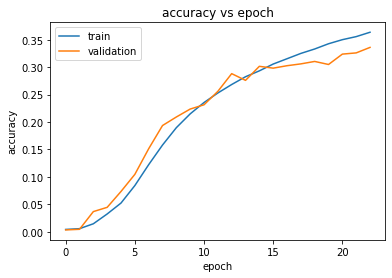

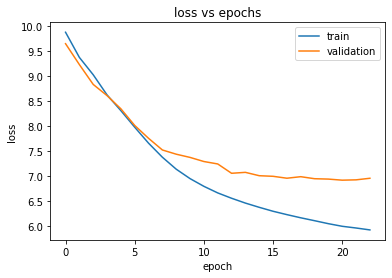

In [42]:
###-----plot accuracy-----------
# plot training accuracy
plt.plot(History.history['accuracy'])
# plot validation accuracy
plt.plot(History.history['val_' + 'accuracy'])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(History.history['loss'])
# plot validation loss
plt.plot(History.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

# 4. Results

The final goal of the model, the test set accuracy is 32%. This seems to be very low, but compared to arbitrary guess 
\begin{equation}
\frac{1}{38891}*100=0.0026\%
\end{equation}
this result is fairly high. 

We can have a look on the predicted results.

In [43]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [49]:
print("Correctly predicted names: ")
for n in range(0,50):
    result = np.where(vec == y_pred[n])
    result2 = np.where(vec == y_test[n])
    if target_list[result2[0][0]] == target_list[result[0][0]]:
        print("Name: ",target_list[result2[0][0]])
        print("This name appeared in the test set {} times".format(result2[0].shape[0]))

Correctly predicted names: 
Name:  CAMILLE
This name appeared in the test set 358 times
Name:  EVA
This name appeared in the test set 203 times
Name:  YANNIS
This name appeared in the test set 30 times
Name:  SARAH
This name appeared in the test set 270 times
Name:  CECILE
This name appeared in the test set 28 times
Name:  SARAH
This name appeared in the test set 270 times
Name:  MAXIME
This name appeared in the test set 272 times
Name:  LEA
This name appeared in the test set 455 times
Name:  CHLOE
This name appeared in the test set 343 times
Name:  LISA
This name appeared in the test set 191 times
Name:  ELIOTT
This name appeared in the test set 48 times
Name:  ANTOINE
This name appeared in the test set 286 times
Name:  AMANDINE
This name appeared in the test set 90 times
Name:  SARAH
This name appeared in the test set 270 times
Name:  ANTONIN
This name appeared in the test set 81 times


In [48]:
print("Incorrectly predicted names: ")
for n in range(0,50):
    result = np.where(vec == y_pred[n])
    result2 = np.where(vec == y_test[n])
    if target_list[result2[0][0]] != target_list[result[0][0]]:
        print("Name: ",target_list[result2[0][0]])
        print("This name appeared in the test set {} times".format(result2[0].shape[0]))

Incorrectly predicted names: 
Name:  REALE
This name appeared in the test set 2 times
Name:  TURRIN
This name appeared in the test set 1 times
Name:  GOUTARD
This name appeared in the test set 2 times
Name:  PASQUIOU
This name appeared in the test set 1 times
Name:  MINET
This name appeared in the test set 6 times
Name:  MELIHANUR
This name appeared in the test set 1 times
Name:  KLARA
This name appeared in the test set 11 times
Name:  BUTLER
This name appeared in the test set 1 times
Name:  TOUROIS
This name appeared in the test set 1 times
Name:  JOALHIM
This name appeared in the test set 1 times
Name:  HIA
This name appeared in the test set 1 times
Name:  PIFRE
This name appeared in the test set 1 times
Name:  VANESSA
This name appeared in the test set 8 times
Name:  MANI
This name appeared in the test set 2 times
Name:  DARIA-ALEXANDRA
This name appeared in the test set 1 times
Name:  SILAS
This name appeared in the test set 1 times
Name:  ELYSE
This name appeared in the test set 3

In [74]:
target_series=pd.Series(target_list)

In [75]:
target_counts=target_series.value_counts()

In [78]:
target_counts.shape

(38891,)

In [79]:
target_counts[target_counts<30]

LAMBERT     29
FOURNIER    29
HANON       29
MEHDI       29
LEROUX      29
            ..
ATTALE       1
CEPHORA      1
PADOVAN      1
HOLQUIN      1
HELIES       1
Length: 38601, dtype: int64

**Important observation 1:** The correctly predicted names are short and frequently appeared in the dataset. On the contrary, The incorrectly predicted names are less appeared. The names appeared less than 30 times constitute the 99% of the dataset. 

Next check the incorrectly predicted names but appeared more often.

Incorrectly predicted names which appeared more frequently: 


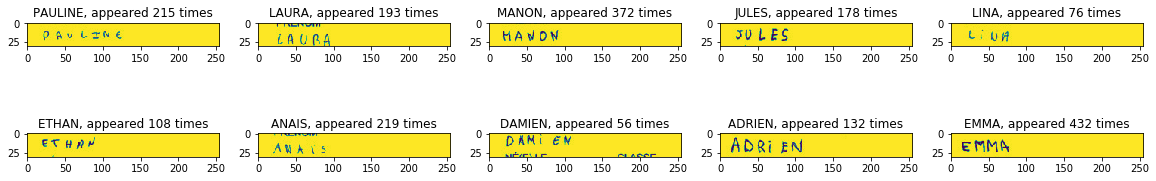

In [62]:
plt.figure(figsize=(20, 20))
i=0
print("Incorrectly predicted names which appeared more frequently: ")
for n in range(0,500):
    result = np.where(vec == y_pred[n])
    result2 = np.where(vec == y_test[n])
    if target_list[result2[0][0]] != target_list[result[0][0]]:
        if result2[0].shape[0] >= 40:
            i += 1
            ax = plt.subplot(10, 5, i)
            sample=X_2[result2[0][0]].reshape(31, 255)
            ax.imshow(sample)
            plt.title("{}, appeared {} times".format(target_list[result2[0][0]],result2[0].shape[0]))
            #print("Name: ",target_list[result2[0][0]])
            #print("This name appeared in the test set {} times".format(result2[0].shape[0]))

**Important Observation 2:** For the first 500 images, only 10 names are incorrectly predicted and which appeared more often, However, 3 to 4 images are even difficult to recognize by human eyes. 

Combine the above two important observations, 32% accuracy actually gives a good result. Especially, considering deep learning models are hungry to data, with less freqeuntly appread names and images which are difficult to recognize by human eyes, the result is still acceptable. 

In order to obtain this result, many parameters are experimented. 
1. Bath size. A high batch size 512 is used in the calculations. This seems to be the best way to prevent overfitting. Other parameters do not give better results than a high batch size.
2. Early stopping. A high batch size cures overfitting below 20 epochs. In order to further prevention from overfitting, early stopping is used. Where the ```callback``` parameter moniter validation loss, and the patience for stopping the calculation is set as 2 epochs. 
3. Regularization. In order to further prevent overfitting and improve test set accuracy, a ```dropout``` regularization is used before the dense layer. 

From the the train and validation loss, we can see that the model still overfits a bit. Moreover, the values of the losses are a bit high, and accuracy is rather low.

From this point of view, the model can still be improved. For example, using data augmentation for the less appread images, can immediately increase the accuracy of the prediction. However, this exceeds the ability of a local drive. As a next step, this idea can be implemented on a cloud computing system.

# 5. Conclusion

Carefully designed CNN model seems to work relatively nicely for the handwritten recognition. However, it is time and (computational) energy consuming. A cloud computation is needed for higher efficiently. 

By cleaning the data, a lot of data were disregard. Only 1/4 of the original data is used. One can include those data and try to enrich the dataset, which may further increase the accuracy.

At the same time, there are handwritten images which are already difficult to recognize by human eyes. After enriching the dataset, one should also pay attention to these datasets, avoiding such datasets may also improve accuracy. 

However, this model has a big drawback. It only can predict names in the form of images in the dataset. For a general purpose, scanned names outside of the datasets cannot be predicted. In order to make it happe, one can also encode the names by each letter (including white spaces) and detect the accuracy. However, how to make labels and choose loss function remains open for the future. For this purpose, RNN models are used elsewhere. These can be the works for the future.